<img src="../igor-matheus.png" style="display:block;margin-left:auto;margin-right:auto;"></img>

# San Francisco Salaries Dataset

<p style="text-align:justify">One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014. <a href="https://www.kaggle.com/kaggle/sf-salaries/version/2">Get this dataset on Kaggle!</a></p>

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

## Data import:

In [2]:
data = pd.read_csv("Salaries.csv",low_memory=False,index_col="Id")

In [3]:
data.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148654 entries, 1 to 148654
Data columns (total 12 columns):
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148049 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            112495 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              38119 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 14.7+ MB


## Data treatment

In [5]:
def string_to_float(string):
    try:
        return np.float(string)
    except:
        return np.nan

In [6]:
for column in ["BasePay","OvertimePay","OtherPay","Benefits","TotalPay","TotalPayBenefits"]:
    data[column] = data[column].apply(lambda x: string_to_float(x))

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148654 entries, 1 to 148654
Data columns (total 12 columns):
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              38119 non-null object
dtypes: float64(7), int64(1), object(4)
memory usage: 14.7+ MB


## Data overview:

In [8]:
data.drop(["Year","Notes"],axis=1).describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000
mean,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811
std,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000
25%,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000
50%,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000
75%,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000


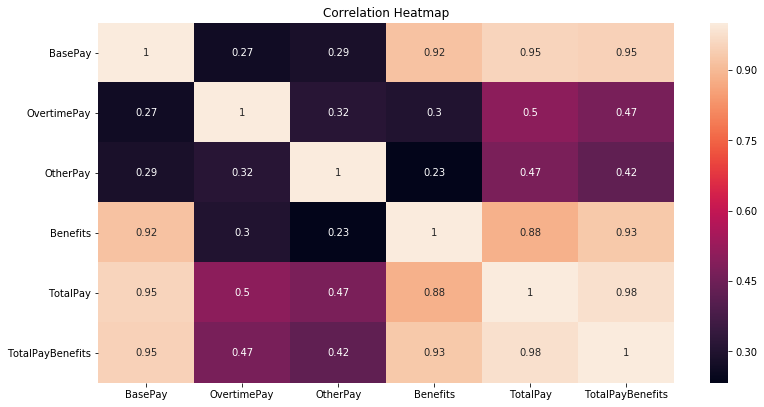

In [9]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1],title="Correlation Heatmap")
sns.heatmap(data=data.drop(["Year","Notes"],axis=1).corr(),annot=True,ax=ax)

## Data statistics

In [10]:
print("There are {} unique job titles in this dataset.".format(data["JobTitle"].nunique()))

There are 2159 unique job titles in this dataset.


**The 5 most frequent job titles are:**

In [11]:
data["JobTitle"].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**The 5 most frequent employee names are:**

In [12]:
data["EmployeeName"].apply(lambda x: x.split()[0]).value_counts().head(5)

Michael    2070
John       1542
David      1444
James      1233
Robert     1206
Name: EmployeeName, dtype: int64

**The highest-paid person with benefits (TotalPayBenefits) is:**

In [13]:
data.loc[data["TotalPayBenefits"].idxmax()].to_frame().transpose()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595,567595,2011,NaN,San Francisco,NaN


**The lowest-paid person with benefits (TotalPayBenefits) is:**

In [14]:
data.loc[data["TotalPayBenefits"] == data["TotalPayBenefits"].min()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,PT


**The amount of job titles possessed by a single person throughout the time period of this dataset is:**

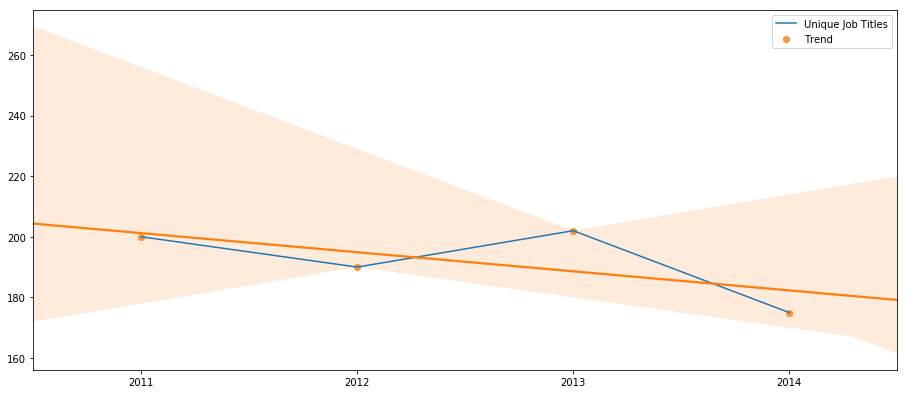

In [15]:
filtered_results = data.groupby("Year")["JobTitle"].value_counts().apply(lambda group: group if group==1 else np.nan).dropna()
years = list(data["Year"].unique())
n_unique = [filtered_results[year].count() for year in years]

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1],xticks=range(2011,2015),xlim=(2010.5,2014.5))
sns.lineplot(years,n_unique,label="Unique Job Titles")
sns.regplot(years,n_unique,label="Trend")
ax.legend()

del(filtered_results,years,n_unique)

**Employees with negative BasePay:**

In [16]:
data.loc[data["BasePay"]<0]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
72833,Irwin Sidharta,Junior Clerk,-166.01,249.02,0.0,6.56,83.01,89.57,2012,NaN,San Francisco,NaN
72866,Robert Scott,Junior Clerk,-121.63,182.70,0.0,5.44,61.07,66.51,2012,NaN,San Francisco,NaN
72873,Chung Huey Kung,Junior Clerk,-109.22,163.83,0.0,4.32,54.61,58.93,2012,NaN,San Francisco,NaN
72875,Jordan Li,Junior Clerk,-106.60,159.90,0.0,4.66,53.30,57.96,2012,NaN,San Francisco,NaN
72879,Richard Jackson,Junior Clerk,-101.88,153.08,0.0,4.55,51.20,55.75,2012,NaN,San Francisco,NaN
72885,DiMarco McGhee-Stewart,Junior Clerk,-93.14,139.97,0.0,4.17,46.83,51.00,2012,NaN,San Francisco,NaN
72889,Leopoldo Marasigan,Junior Clerk,-87.38,131.06,0.0,3.89,43.68,47.57,2012,NaN,San Francisco,NaN
72895,Douglas Avalos,Junior Clerk,-75.67,113.76,0.0,3.39,38.09,41.48,2012,NaN,San Francisco,NaN
72909,Norma Rodriguez,Junior Clerk,-59.59,89.65,0.0,2.68,30.06,32.74,2012,NaN,San Francisco,NaN


In [17]:
print("Total: {}".format(len(data.loc[data["BasePay"]<0])))

Total: 11


**Base salary vs. Density of Employees:**

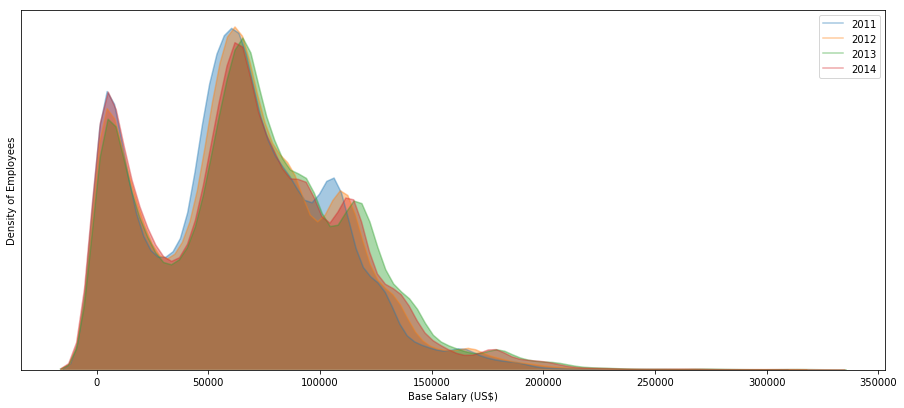

In [18]:
fig = plt.figure(figsize=(12,5))
ax  = fig.add_axes([0,0,1,1],xlabel="Base Salary (US$)",yticks=[],ylabel="Density of Employees")


sns.kdeplot(data.loc[data["Year"]==2011]["BasePay"].dropna(),shade=True,label="2011",alpha=.4)
sns.kdeplot(data.loc[data["Year"]==2012]["BasePay"].dropna(),shade=True,label="2012",alpha=.4)
sns.kdeplot(data.loc[data["Year"]==2013]["BasePay"].dropna(),shade=True,label="2013",alpha=.4)
sns.kdeplot(data.loc[data["Year"]==2014]["BasePay"].dropna(),shade=True,label="2014",alpha=.4)